# Data Cleaning and Analysis
## Transforming Data With Pandas
In this mission, we learned how to transform data using the Series.map(), Series.apply(), DataFrame.apply(), and DataFrame.applymap() methods along with the pd.melt() function. Below is a summary chart of the differences between the map(), apply(), and applymap() methods:

| Method   | Series or Dataframe Method | Applies Functions Element-wise?     |
|----------|----------------------------|-------------------------------------|
| Map      | Series                     | Yes                                 |
| Apply    | Series                     | Yes                                 |
| Applymap | Dataframe                  | Yes                                 |
| Apply    | Dataframe                  | No, applies functions along an axis |

As you explore pandas, you'll also find that pandas has a method to "un-melt" the data, or transform rows into columns. This method is called the df.pivot() method, not to be confused with the df.pivot_table() method used to aggregate data. Although we couldn't cover the df.pivot() method explicitly in this mission, we encourage you to explore it on your own.

In the next mission, we'll learn how to manipulate strings in pandas as we continue building on what we've learned so far.

### Initial Setup

#### Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Stylistics

In [2]:
%matplotlib inline
plt.style.use("dark_background")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

#### Importing Dataset

In [3]:
happiness2015 = pd.read_csv("../datasets/World_Happiness_2015.csv")

### Introduction
Recall that the 2015 World Happiness Report is saved to a variable named happiness2015. We also created a dictionary named mapping for renaming columns.

- Use the DataFrame.rename() method to change the 'Economy (GDP per Capita)', 'Health (Life Expectancy)', and 'Trust (Government Corruption)' column names to the names specified in the mapping dictionary.
    - Pass the mapping dictionary into the df.rename() method and set the axis parameter to 1.
    - Assign the result back to happiness2015.

In [5]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015.rename(mapping, axis=1, inplace=True)

### Apply a Function Element-wise Using the Map and Apply Methods
- Use the Series.map() method to apply the label function to the Economy column in happiness2015. Assign the result to economy_impact_map.
- Use the Series.apply() method to apply the function to the Economy column. Assign the result to economy_impact_apply.
- Use the following code to check if the methods produce the same result: economy_impact_map.equals(economy_impact_apply). Assign the result to a variable named equal.

In [6]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness2015["Economy"].map(label)
economy_impact_apply = happiness2015["Economy"].apply(label)
equal = economy_impact_map.equals(economy_impact_apply)

### Apply a Function Element-wise Using the Map and Apply Methods Continued
- Update label to take in another argument named x. If the element is greater than x, return 'High'. Otherwise, return 'Low'.
- Then, use the apply method to apply label to the Economy column and set the x argument to 0.8. Save the result back to economy_impact_apply.

In [10]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x = 0.8)

### Apply a Function Element-wise to Multiple Columns Using Applymap Method
We've already created a list named factors containing the column names for the six factors that contribute to the happiness score.

- Use the df.applymap() method to apply the label function to the columns saved in factors in happiness2015. Assign the result to factors_impact.

In [16]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label, x=0.6)

TypeError: label() missing 1 required positional argument: 'x'

### Apply Functions along an Axis using the Apply Method
- Create a function that calculates the percentage of 'High' and 'Low' values in each column.
    - Create a function named v_counts that accepts one parameter called col.
    - Use the Series.value_counts() method to calculate the value counts for col. Assign the result to num.
    - Use the Series.size attribute to calculate the number of rows in the column. Assign the result to den.
    - Divide num by den and return the result.
- Use the df.apply() method to apply the v_counts function to all of the columns in factors_impact. Assign the result to v_counts_pct.

In [32]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return (num/den)

v_counts_pct = factors_impact.apply(v_counts)

### Apply Functions along an Axis using the Apply Method Continued
- Create a function that converts each of the six factor columns and the Dystopia Residual column to percentages.
    - Create a function named percentages that accepts one parameter called col.
    - Divide col by the Happiness Score column. Assign the result to div.
    - Multiply div by 100 and return the result.
- Use the df.apply() method to apply the percentages function to all of the columns in factors. Assign the result to factor_percentages.

In [33]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col / happiness2015["Happiness Score"]
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)

### Reshaping Data with the Melt Function
- Use the melt function to reshape happiness2015. The columns listed in main_cols should stay the same. The columns listed in factors should be transformed into rows. Assign the result to a variable called melt.
- Convert the value column to a percentage.
    - Divide the value column by the Happiness Score column and multiply the result by 100.
    - Use the round() function to round the result to 2 decimal places.
    - Assign the result to a new column called Percentage.

In [53]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
melt["Percentage"] = round((melt["value"] / melt["Happiness Score"])*100, 2)

### Challenge: Aggregate the Data and Create a Visualization
- Use the df.pivot_table() method to create a pivot table from the melt dataframe. Set the variable column as the index and the value column as the values. Assign the result to pv_melt.
- Use the df.plot() method to create a pie chart of the results. Set the kind parameter to 'pie', the y parameter to 'value', and the legend parameter to False, so we can better see the results.
- If we disregard Dystopia Residual, which two factors, on average, contribute the most to the happiness score?

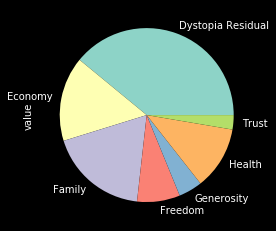

In [55]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index="variable", values="value")
_ = pv_melt.plot(kind="pie", y="value", legend=False)